<a href="https://colab.research.google.com/github/CamH123/Thyroid-Disease-Doctor/blob/main/Thyroid_Visualization_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Thyroid Visualizations

### Rice Data Science DEEP Program - Team 3

This notebook is where you will create visualizations for the thyroid data set. As an overall goal, aim to create the following 7 visualizations:
1. A histogram, box plot, bar chart, or other distributional plot showing the distribution of a single variable.
2. A pairs plot including every variable.
3. A correlation plot including every variable.
4. Four presentation quality visualizations that give some valuable insight into the thyroid data.

For ideas as to what visualizations you can make you can check out the seaborn gallery here: https://seaborn.pydata.org/examples/index.html. Additionally, this [seaborn cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf) may be useful. Finally, the workshop last time used the `matplotlib` and `seaborn` packages; personally, I am not the biggest fan of either of these (and especially `matplotlib`) as they tend to be a bit restrictive in what you can visualize. While it certainly is not required, I think it's worth your time trying out the `plotnine` package. The way you make plots with it is very different from `seaborn`. You essentially create plots by adding on the components of the plot rather than being restricted to using a single function to create the plot. I have created a brief demo below.

**Once you are done with your visualizations I will let everyone vote on their favorites and include these in the final presentation.**

In [ ]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.impute import KNNImputer

# Loading thyroid data
thyroid_dat = pd.read_csv("thyroidDF.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data cleaning from last time
# Clean up age column
thyroid_dat['age'] = thyroid_dat['age'].apply(lambda x: np.NaN if x > 100 else x)

# Convert categorical predictor variables to 0's and 1's
thyroid_clean = pd.get_dummies(thyroid_dat, columns=thyroid_dat.loc[:, thyroid_dat.nunique() < 7].columns, drop_first=True)

# Impute missing values
# Initialize KNNImputer with a specified number of neighbors (default is 5)
imputer = KNNImputer(n_neighbors=3)

# Apply the KNN imputer to the DataFrame
thyroid_clean = pd.DataFrame(imputer.fit_transform(thyroid_clean.select_dtypes(include = ["int", "float", "bool"])),
                          columns=thyroid_clean.select_dtypes(include = ["int", "float", "bool"]).columns)

# Add back target variable
thyroid_clean['target'] = thyroid_dat['target']
thyroid_clean.head()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id,sex_M,on_thyroxine_t,...,TT4_measured_t,T4U_measured_t,FTI_measured_t,TBG_measured_t,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_WEST,referral_source_other,target
0,29.0,0.300000,2.1,106.666667,1.006667,72.0,24.333333,840801013.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-
1,29.0,1.600000,1.9,128.000000,1.006667,72.0,24.333333,840801014.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-
2,41.0,0.866667,2.1,106.666667,1.006667,72.0,11.000000,840801042.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-
3,36.0,0.866667,2.1,106.666667,1.006667,72.0,26.000000,840803046.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-
4,32.0,0.866667,2.1,106.666667,1.006667,72.0,36.000000,840803047.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,S


### Plotnine Demo

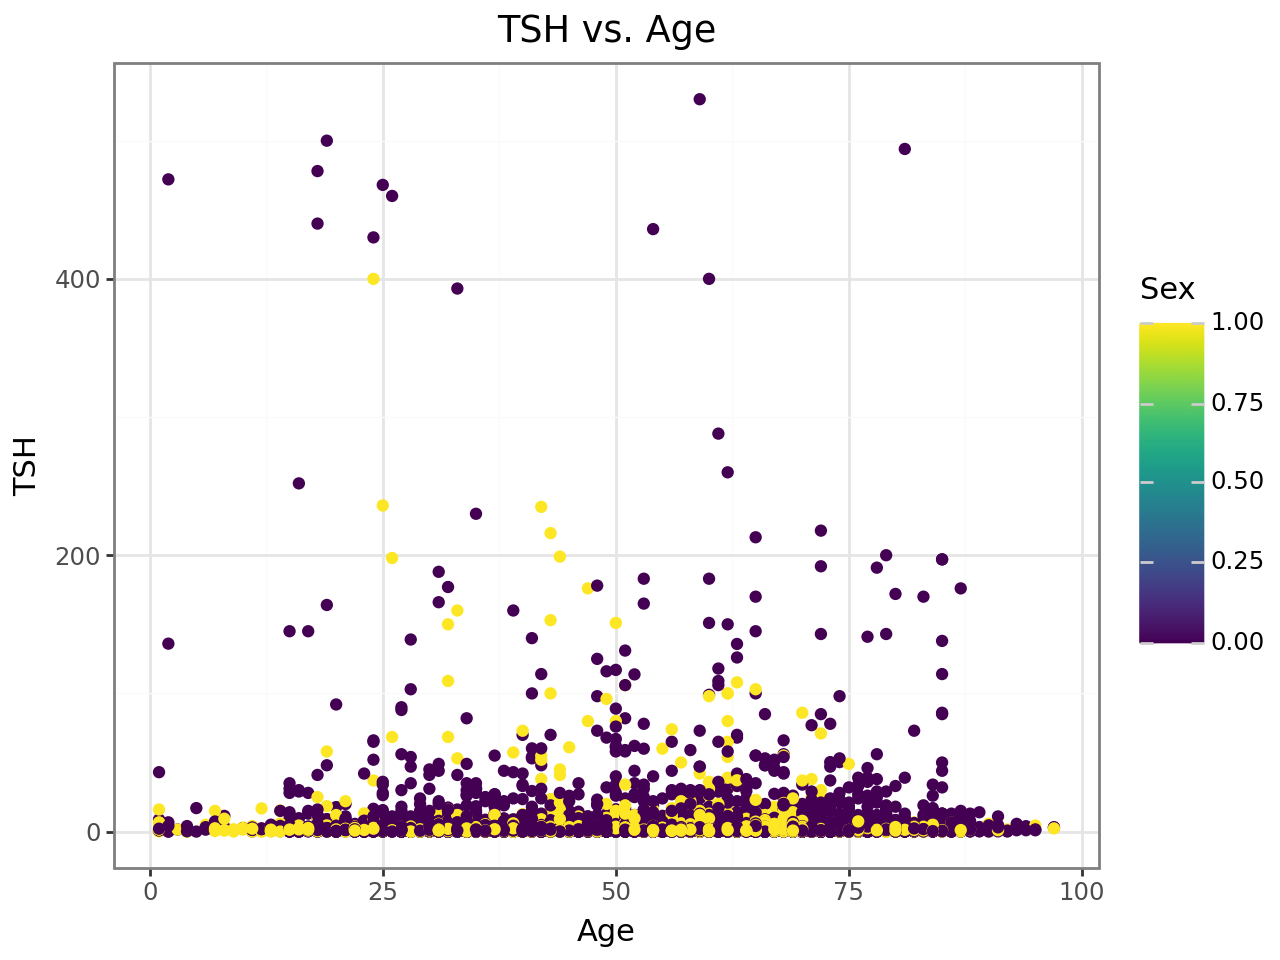

In [ ]:
(
    ggplot(thyroid_clean, aes(x='age', y='TSH', color='sex_M')) # Define data and variables within the plot
    + geom_point() # Add points to the plot
    + labs(title = 'TSH vs. Age', x='Age', y='TSH', color='Sex') # Add text to the plot
    + theme_bw() # Change theme of the plot
)

### Visualization 1: Distribution Plot

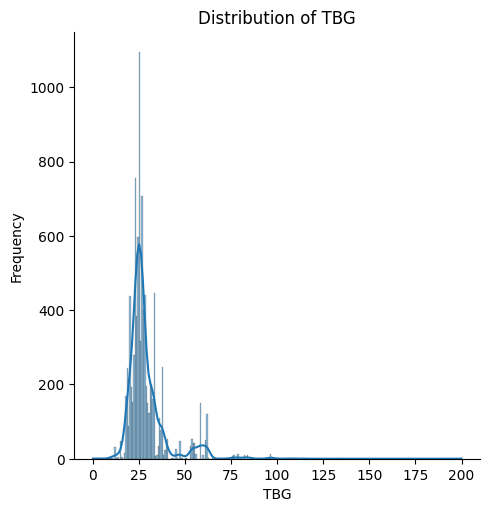

In [ ]:
# prompt: create a distribution plot

# Distribution plot of age
sns.displot(thyroid_clean['TBG'], kde=True)
plt.title('Distribution of TBG')
plt.xlabel('TBG')
plt.ylabel('Frequency')
plt.show()

### Visualization 2: Pairs Plot

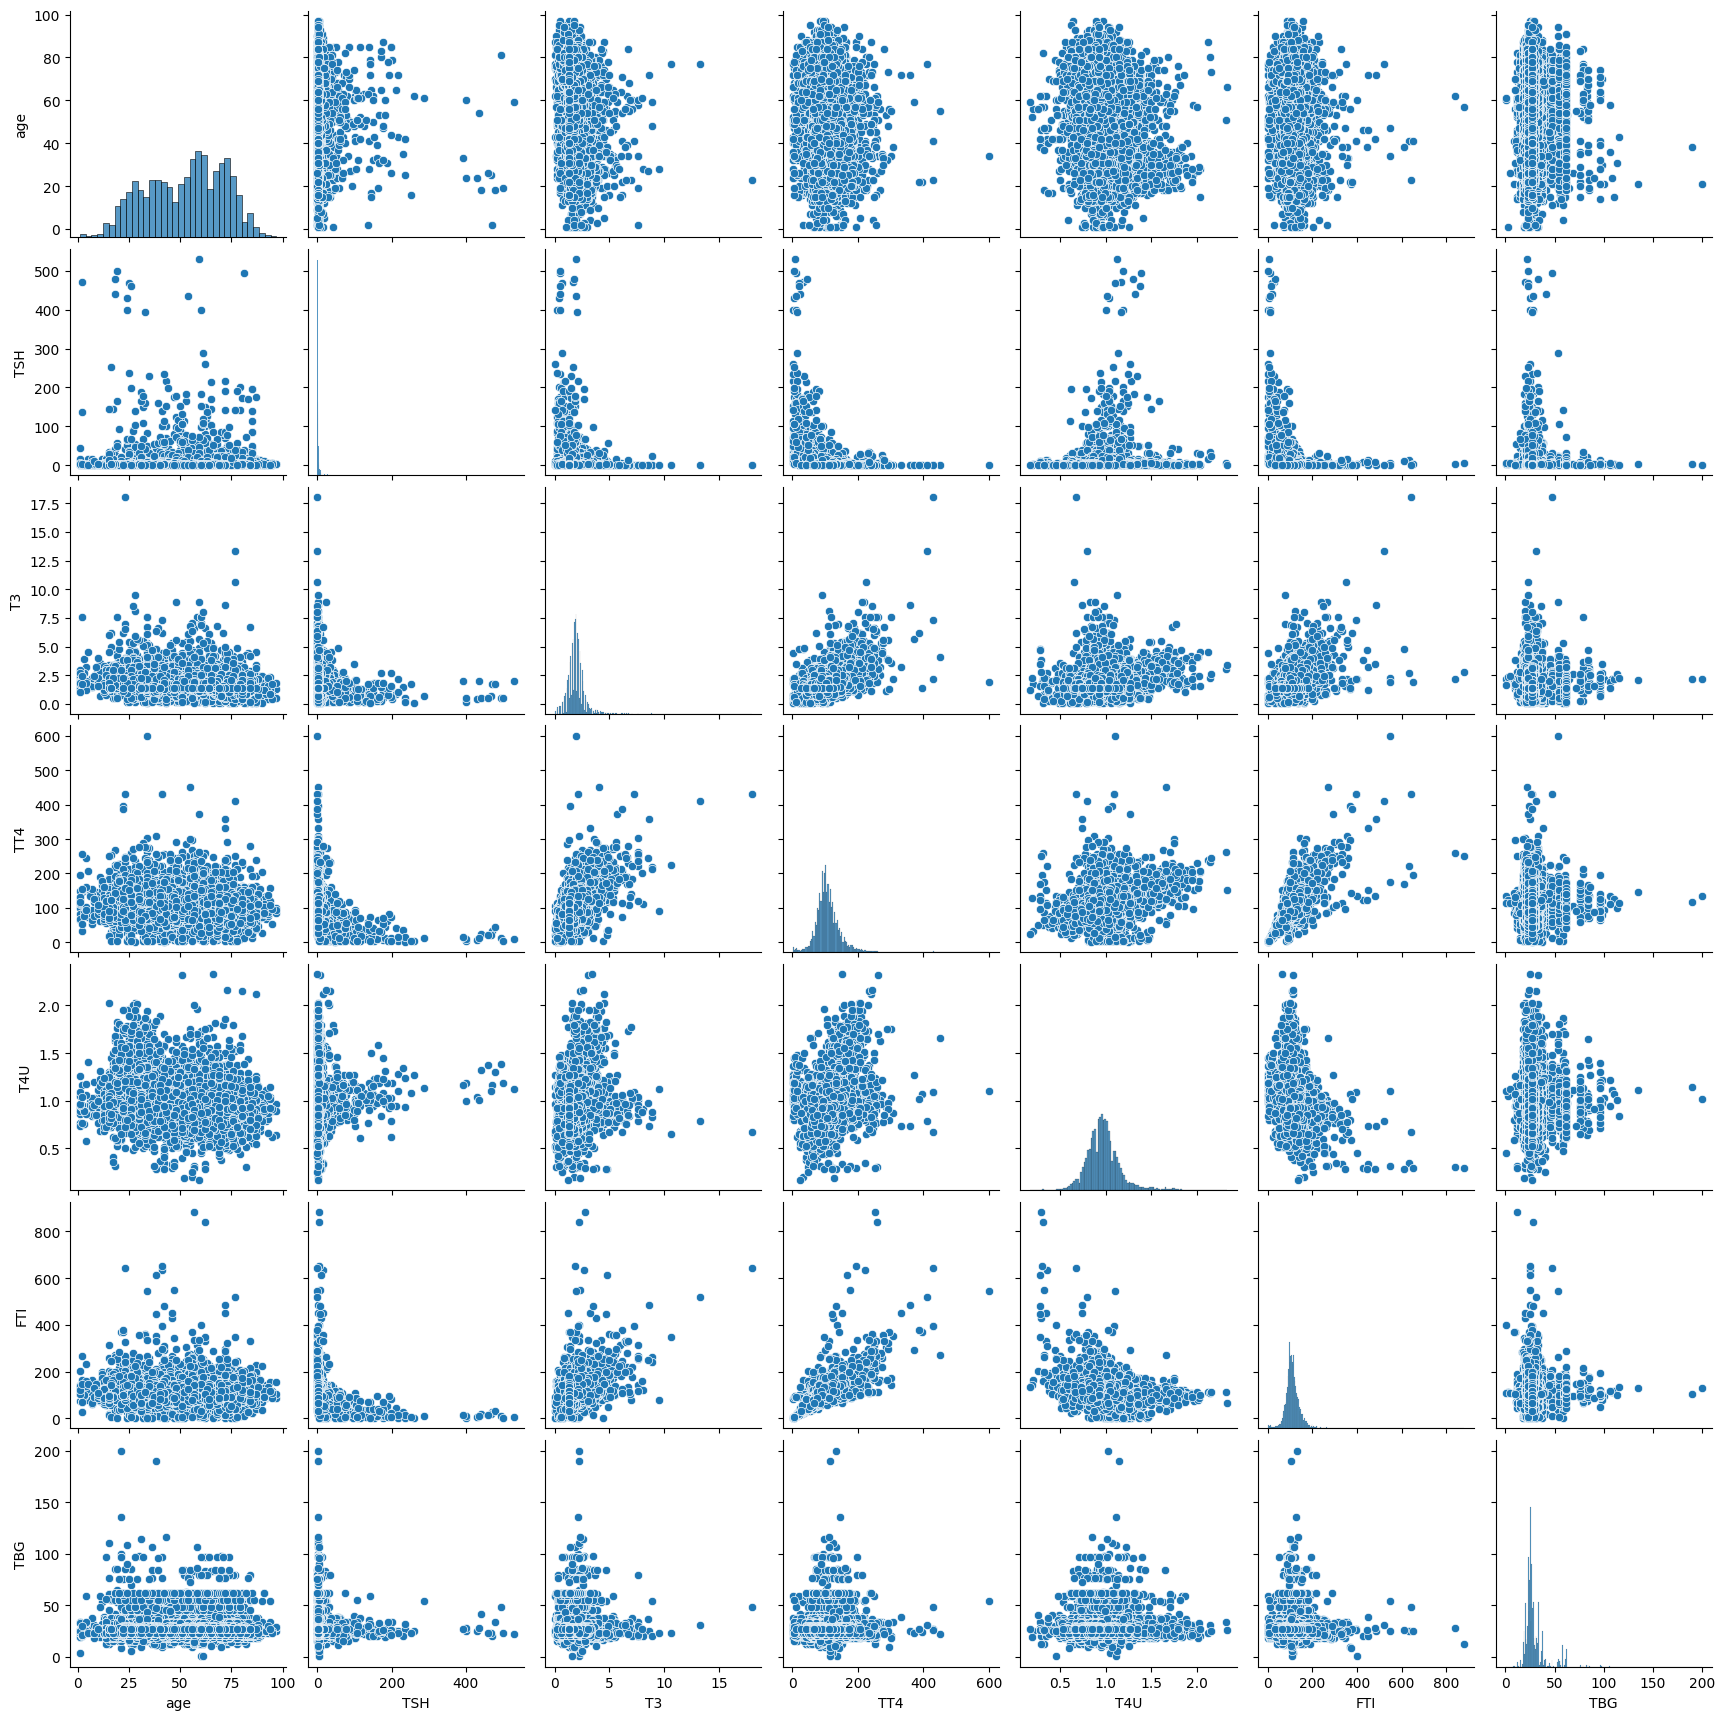

In [ ]:
#age	TSH	T3	TT4	T4U	FTI	TBG
sns.pairplot(thyroid_clean[['age', 'TSH', 'T3', 'TT4', 'T4U', "FTI", "TBG"]])

### Visualization 3: Correlation Plot

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'patient_id', 'sex_M',
       'on_thyroxine_t', 'query_on_thyroxine_t', 'on_antithyroid_meds_t',
       'sick_t', 'pregnant_t', 'thyroid_surgery_t', 'I131_treatment_t',
       'query_hypothyroid_t', 'query_hyperthyroid_t', 'lithium_t', 'goitre_t',
       'tumor_t', 'hypopituitary_t', 'psych_t', 'TSH_measured_t',
       'T3_measured_t', 'TT4_measured_t', 'T4U_measured_t', 'FTI_measured_t',
       'TBG_measured_t', 'referral_source_SVHC', 'referral_source_SVHD',
       'referral_source_SVI', 'referral_source_WEST', 'referral_source_other',
       'target'],
      dtype='object')
Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'patient_id', 'sex_M',
       'on_thyroxine_t', 'query_on_thyroxine_t', 'on_antithyroid_meds_t',
       'sick_t', 'pregnant_t', 'thyroid_surgery_t', 'I131_treatment_t',
       'query_hypothyroid_t', 'query_hyperthyroid_t', 'lithium_t', 'goitre_t',
       'tumor_t', 'hypopituitary_t', 'psych_t', 'TSH_measu

<Axes: >

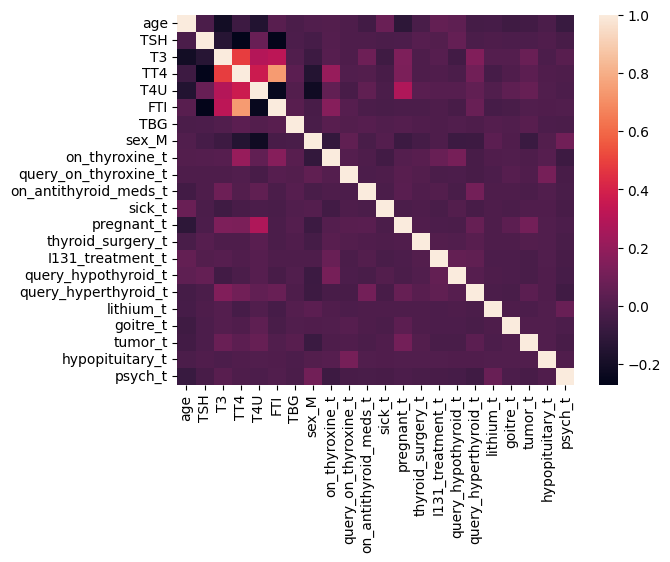

In [ ]:
print(thyroid_clean.columns)
numerical_df = thyroid_clean.select_dtypes(include=np.number) #get only numerical columns
print(numerical_df.columns)
sns.heatmap(thyroid_clean[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'sex_M',
       'on_thyroxine_t', 'query_on_thyroxine_t', 'on_antithyroid_meds_t',
       'sick_t', 'pregnant_t', 'thyroid_surgery_t', 'I131_treatment_t',
       'query_hypothyroid_t', 'query_hyperthyroid_t', 'lithium_t', 'goitre_t',
       'tumor_t', 'hypopituitary_t', 'psych_t']].corr())

### Visualization 4 - 7

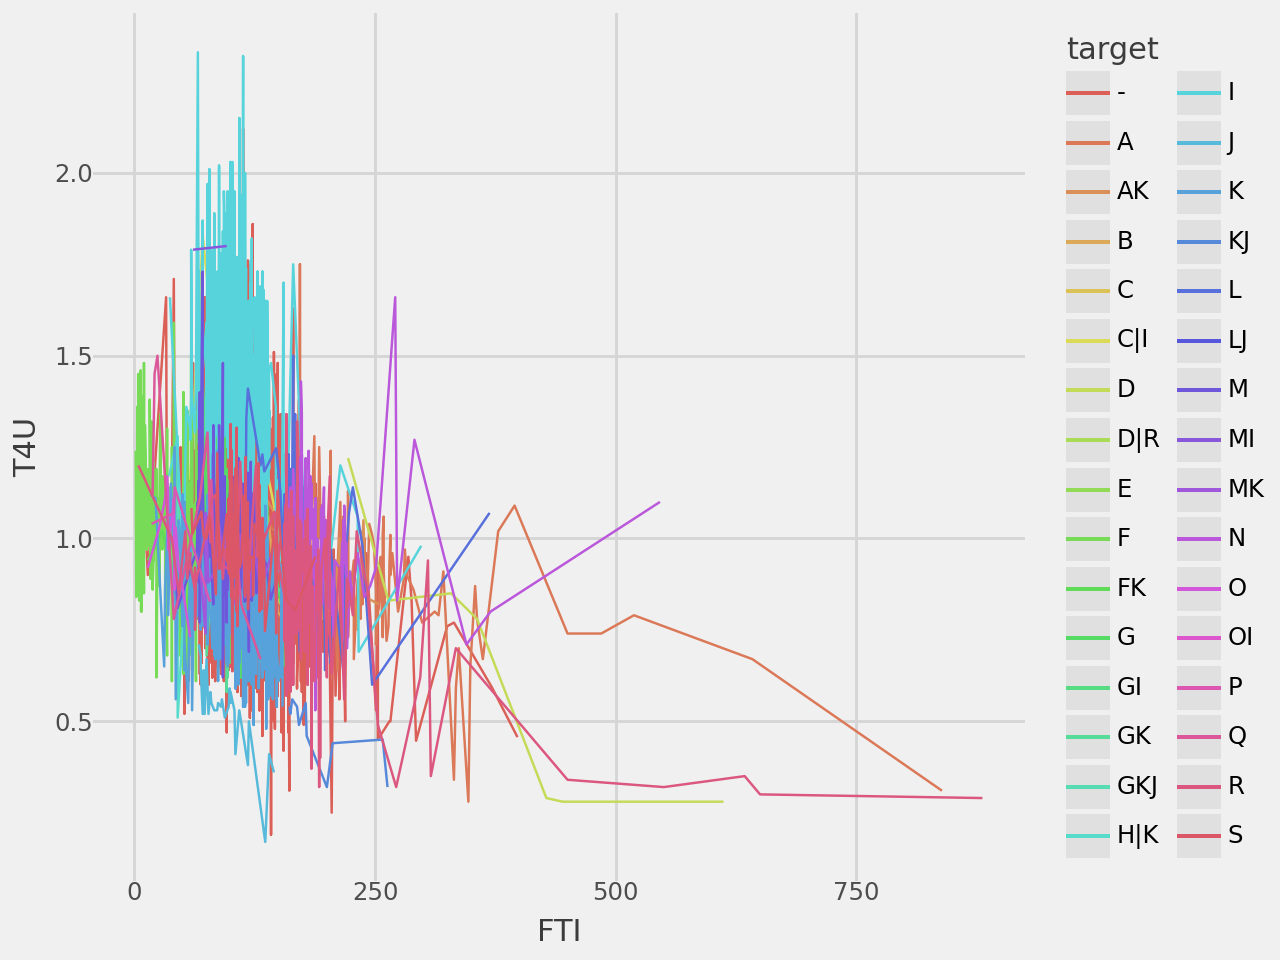

In [ ]:
# Visualization 4
(
    ggplot(thyroid_clean, aes(x="FTI", y="T4U", color="target"))
    + geom_line()
    # Styling
    + theme_538()
)

/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


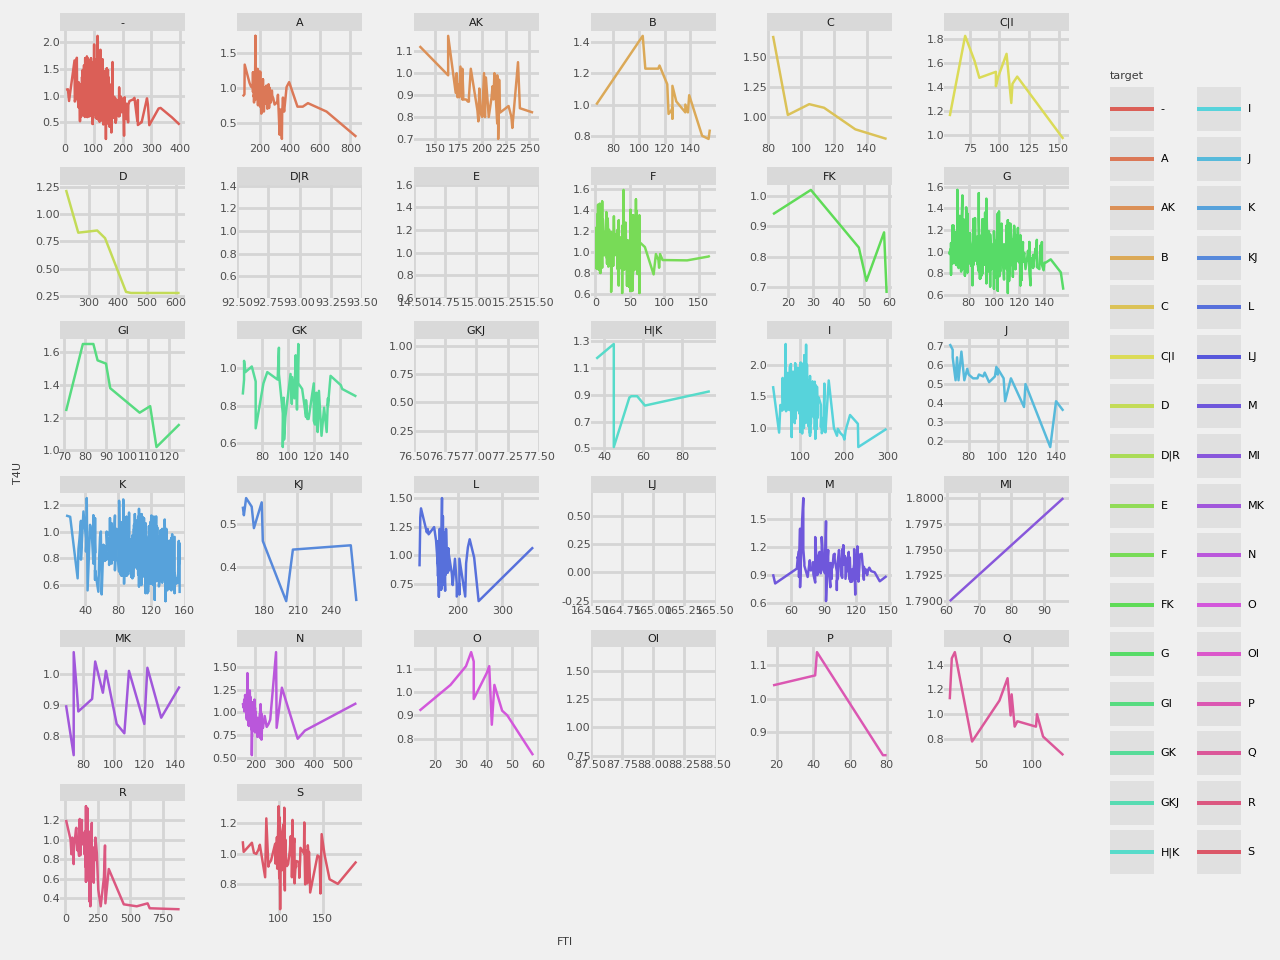

In [ ]:
# Visualization 5
(
    ggplot(thyroid_clean, aes(x="FTI", y="T4U", color="target"))
    + geom_line()
    + facet_wrap('~ target', scales = 'free') # Creates separate panels for each target group
    + theme_538()
    + theme(text=element_text(size=4))
)

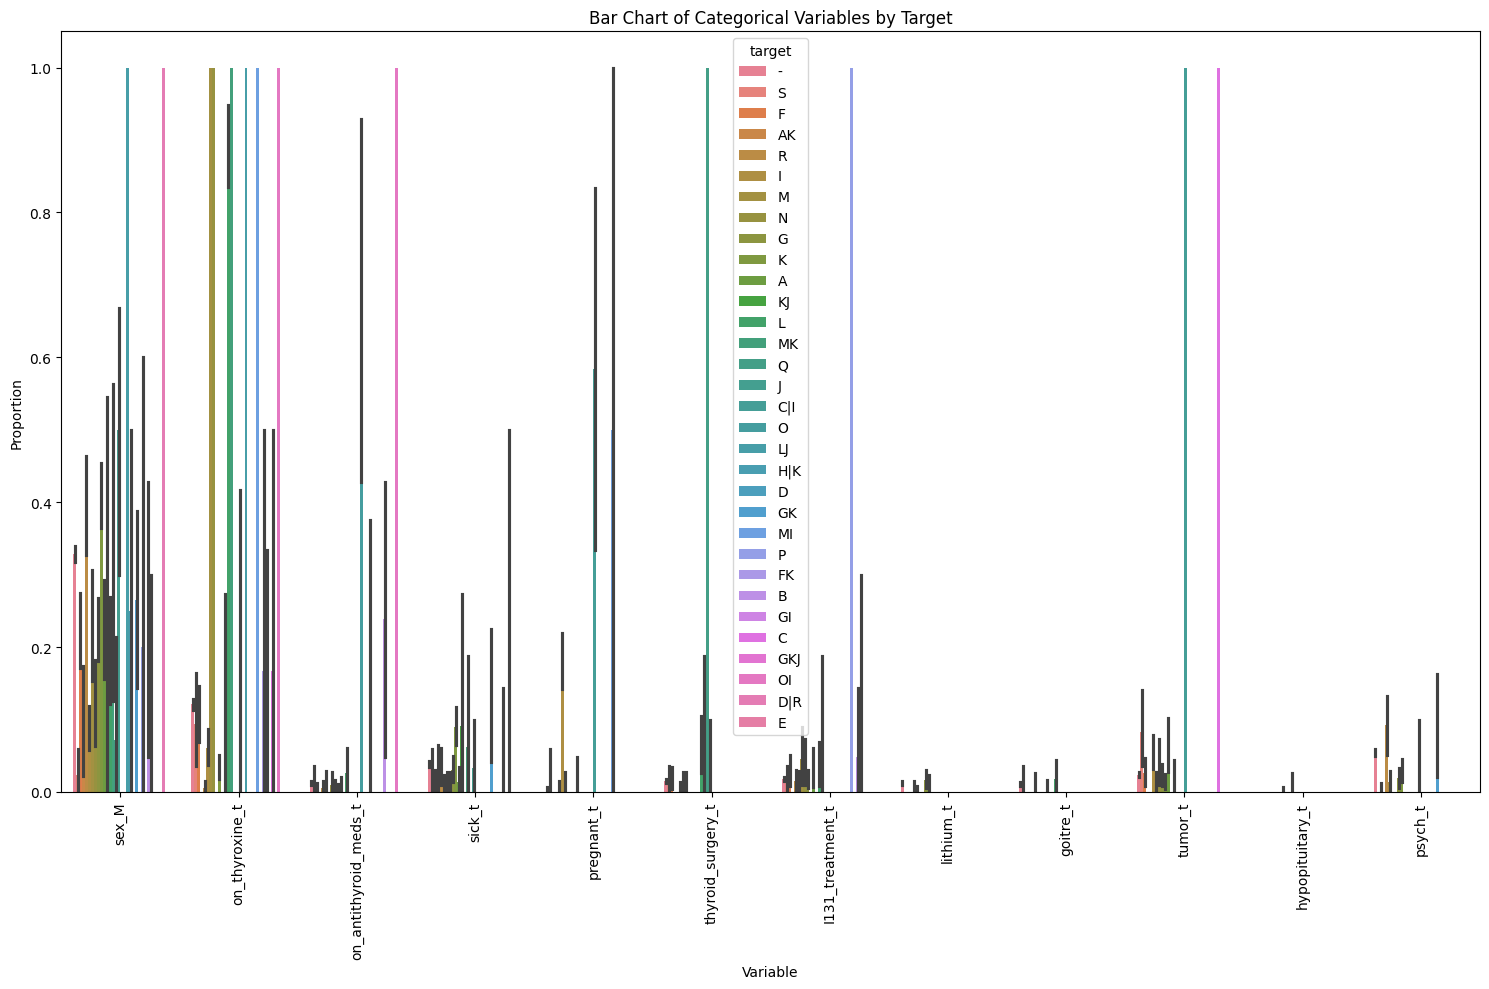

In [ ]:

# Melt the DataFrame to long format
melted_df = pd.melt(thyroid_clean, id_vars=['target'],
                    value_vars=['sex_M', 'on_thyroxine_t',
                               'on_antithyroid_meds_t', 'sick_t', 'pregnant_t',
                               'thyroid_surgery_t', 'I131_treatment_t',
                               'lithium_t', 'goitre_t', 'tumor_t',
                               'hypopituitary_t', 'psych_t'])

# Create the bar chart using seaborn
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
sns.barplot(x='variable', y='value', hue='target', data=melted_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Bar Chart of Categorical Variables by Target')
plt.xlabel('Variable')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()


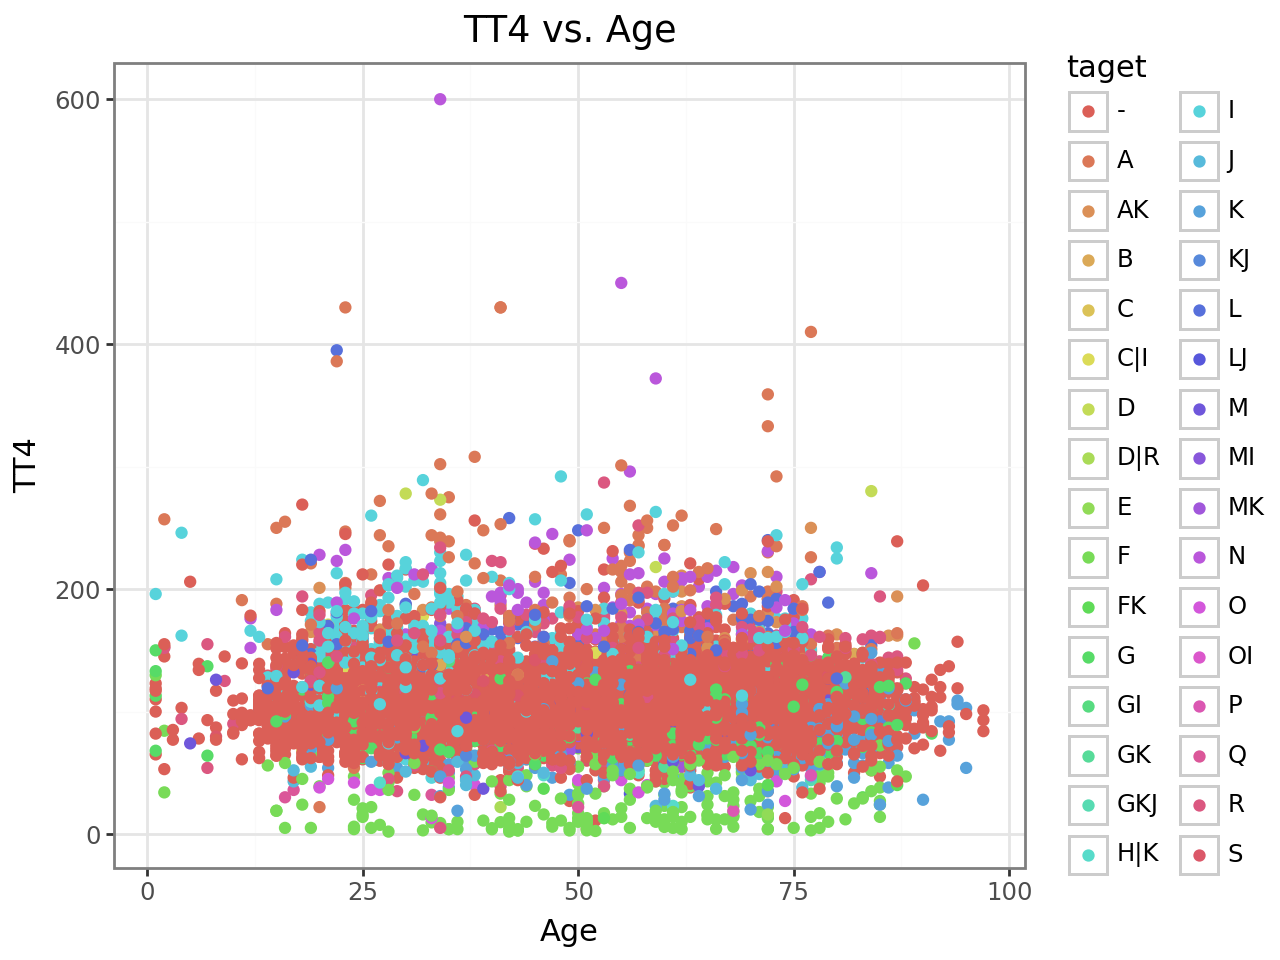

In [ ]:
# Visualization 7
(
    ggplot(thyroid_clean, aes(x='age', y='TT4', color='target')) # Define data and variables within the plot
    + geom_point() # Add points to the plot
    + labs(title = 'TT4 vs. Age', x='Age', y='TT4', color='taget') # Add text to the plot
    + theme_bw() # Change theme of the plot
)

### When You're Done

When you've finished these visualization or we have gotten to the end of the session, then I will need you to email me your colab notebook. I will send out a Google form to everyone in the team, and I will have you all vote on your favorite visualization among those shared with me.